In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
NUM_TRIALS = 100000
BANDIT_PROBABILITIES = [0.2, 0.5, 0.75]

In [8]:
class Bandit:
    def __init__(self, p):
        # p: the win rate
        self.p = p
        self.p_estimate = 0.
        self.N = 0. # num samples collected so far

    def pull(self):
        # draw a 1 with probability p
        return np.random.random() < self.p

    def update(self, x):
        self.N += 1.
        self.p_estimate = self.p_estimate + 1.0 / self.N * (x - self.p_estimate )

In [9]:
def ucb(mean, n, nj):
    return mean + np.sqrt(2 * np.log(n) / nj)

In [10]:
def run_experiment():
    bandits = [Bandit(p) for p in BANDIT_PROBABILITIES]
    rewards = np.empty(NUM_TRIALS)
    total_plays = 0

    # initialization: play each bandit once
    for j in range(len(bandits)):
        x = bandits[j].pull()
        total_plays += 1
        bandits[j].update(x)
  
    for i in range(NUM_TRIALS):
        j = np.argmax([ucb(b.p_estimate, total_plays, b.N) for b in bandits])
        x = bandits[j].pull()
        total_plays += 1
        bandits[j].update(x)

        # for the plot
        rewards[i] = x
        
    cumulative_average = np.cumsum(rewards) / (np.arange(NUM_TRIALS) + 1)
    
    return cumulative_average

In [11]:
c = run_experiment()

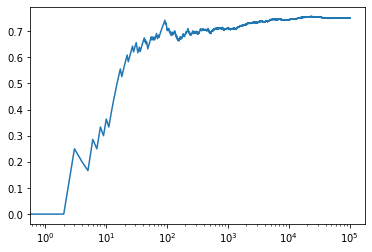

In [12]:
plt.plot(c)
plt.xscale('log')

In [ ]:
len(selected_bandits)

In [ ]:
sum(selected_bandits == 0)

In [ ]:
sum(selected_bandits == 1)

In [ ]:
sum(selected_bandits == 2)